## 3. 데이터에 머신러닝,딥러닝 분석 모델 적용하기

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import import_ipynb
import p2

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [23]:
model = Sequential()
model.add(Dense(units=160, activation='relu', input_dim=58))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 160)            │         9,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 60)             │         9,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │         1,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,341 (79.46 KB)

 Trainable params: 20,341 (79.46 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss',patience=5, mode='min')
history = model.fit(p2.x_train, p2.y_train, epochs=50, batch_size=1, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 10s 801us/step - loss: 137.4994 - mae: 137.4994 - val_loss: 164.4319 - val_mae: 164.4319
Epoch 2/50
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 9s 785us/step - loss: 133.4664 - mae: 133.4664 - val_loss: 149.6661 - val_mae: 149.6661
Epoch 3/50
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 9s 786us/step - loss: 132.7277 - mae: 132.7277 - val_loss: 143.5293 - val_mae: 143.5293
Epoch 4/50
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 9s 783us/step - loss: 133.1494 - mae: 133.1494 - val_loss: 149.9789 - val_mae: 149.9789
Epoch 5/50
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 9s 787us/step - loss: 132.1321 - mae: 132.1321 - val_loss: 211.6276 - val_mae: 211.6276
Epoch 6/50
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 9s 794us/step - loss: 132.3939 - mae: 132.3939 - val_loss: 141.7819 - val_mae: 141.7819
Epoch 7/50
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 9s 784us/step - loss: 128.7364 - mae: 128.7364 - val_loss: 146.9183 - val_mae: 146.9183
Epoch 8/50
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 9s 783us/step - loss: 129.1461 

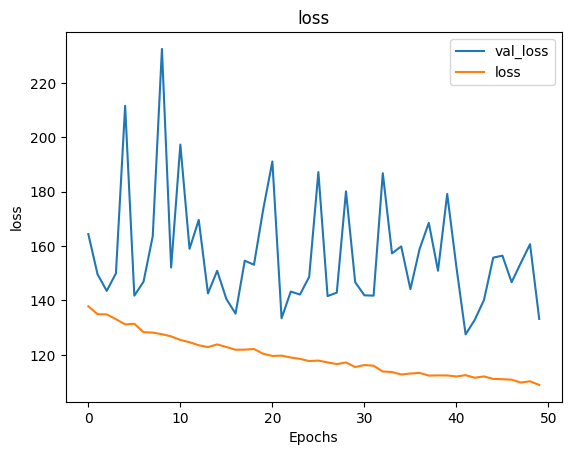

In [28]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss','loss'])
plt.show()

In [33]:
y_predict = model.predict(p2.x_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


- 딥러닝 : 사람이 신경망을 흉내낸 인공신경망기반의 학습
   
random forest같은 경우는 인공신경망기반이 아닌 별도의 알고리즘을 통해 기계가 학습하는 방식임.
- random forest : 숲처럼 수천개의 여러가지 모형들을 만들어서 평균을 만든다거나 투표같은 것을 통해 앙상블 기법을 적용한 모형으로 이해하면 됨. (병렬)
- boosting 계열 : forest는 병렬로 진행된다면 부스팅 계열은 순차적으로 진행되는 것을 의미함

In [34]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict) :
    return np.sqrt(mean_squared_error(y_test, y_predict)) #예측을 한 값과 테스트한 값을 비교하여 루트를 씌운 후, 이 값을 반환

print('RMSE', RMSE(p2.y_test, y_predict))

RMSE 256.280060806786


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=16)

rf.fit(p2.x_train, p2.y_train)
rf_result = rf.predict(p2.x_test)
print(RMSE(p2.y_test, rf_result))

304.1073314009604
